# Proyecto Titanic

## Cargar Librerias

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import re

## Cargar dataset

In [367]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [368]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpieza de datos

In [369]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [370]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Investigacion de datos

<AxesSubplot: xlabel='Survived', ylabel='count'>

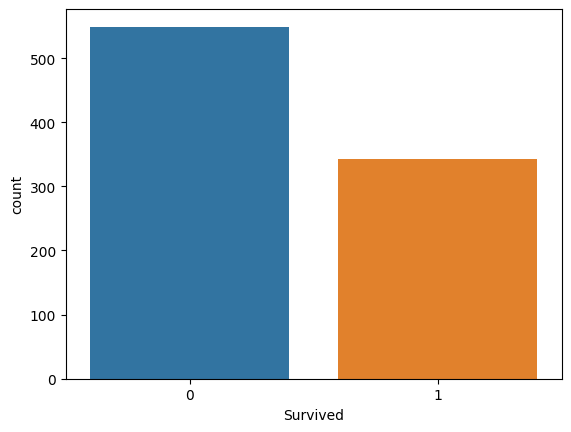

In [371]:
sns.countplot(x = "Survived", data = train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

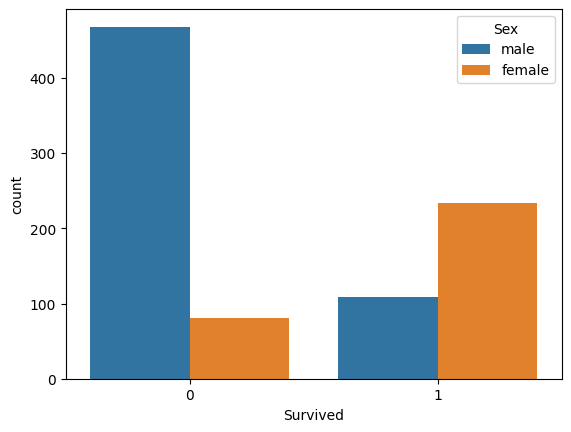

In [372]:
sns.countplot(x = "Survived", hue = "Sex", data = train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

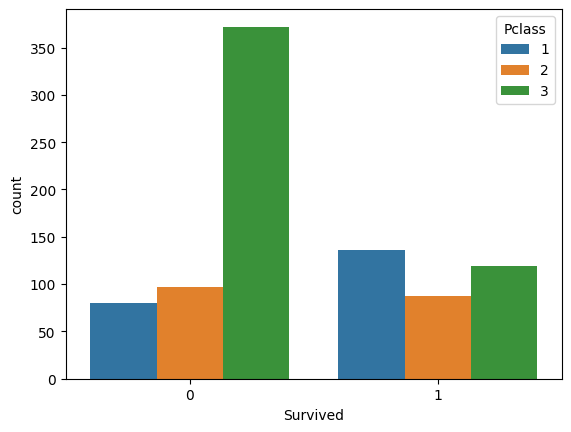

In [373]:
sns.countplot(x = "Survived", hue = "Pclass", data = train)

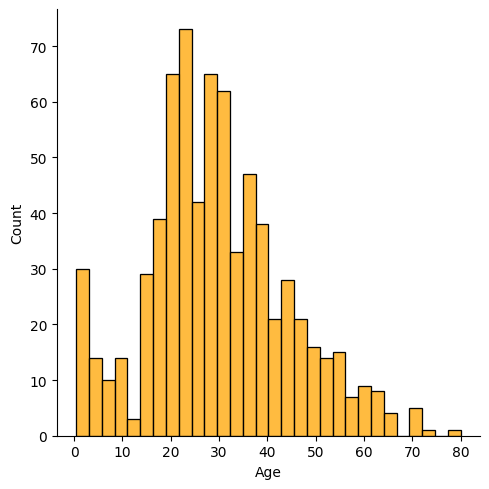

In [374]:
sns.displot(data = train["Age"].dropna(), kde = False, bins = 30, color = 'Orange')

<AxesSubplot: xlabel='Parch', ylabel='count'>

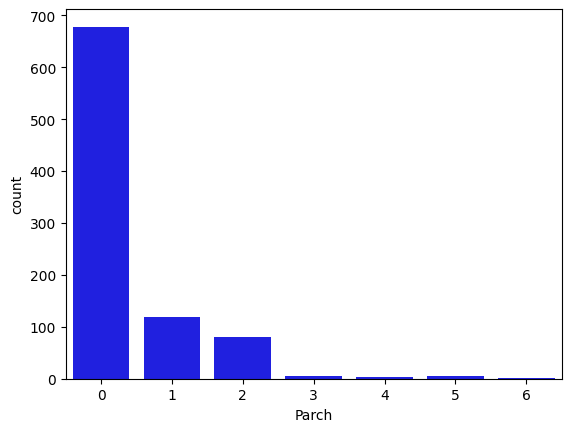

In [375]:
sns.countplot(x = train["Parch"], color = 'Blue')

<AxesSubplot: xlabel='Fare', ylabel='Count'>

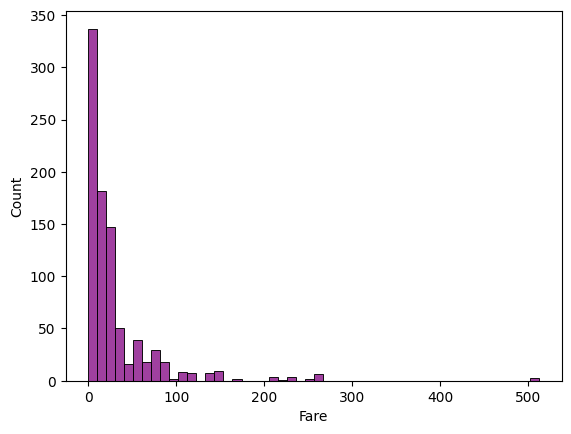

In [376]:
sns.histplot(data = train["Fare"], bins = 50, color = 'Purple')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

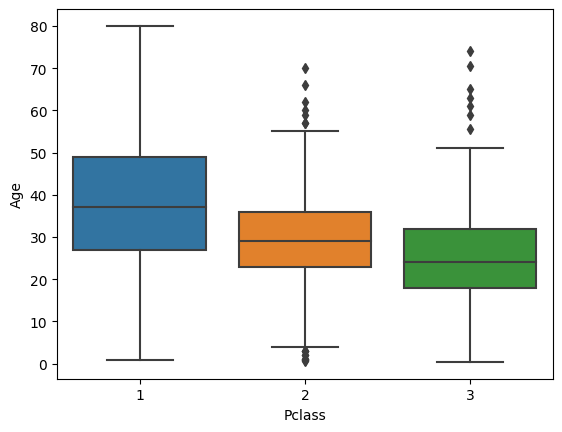

In [377]:
sns.boxplot(x = "Pclass", y = "Age", data = train)

## Imputar Datos

In [378]:
# Imputar edad
def imputar_edad(cols):
    Age = cols [0]
    Pclass = cols [1]
    
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2: 
            return 29
        else:
            return 24
    else:
        return Age

In [379]:
train["Age"] = train[["Age","Pclass"]].apply(imputar_edad, axis = 1)

In [380]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

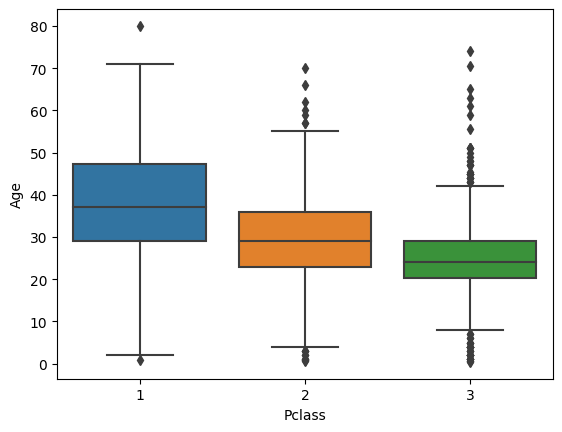

In [381]:
sns.boxplot(x = "Pclass", y = "Age", data = train)

<AxesSubplot: xlabel='SibSp', ylabel='Age'>

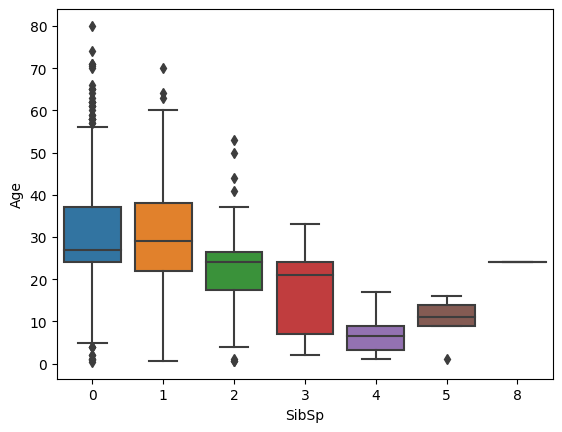

In [382]:
sns.boxplot(x = "SibSp", y = "Age", data = train)

In [383]:
train.drop("Cabin", axis = 1, inplace = True)

In [384]:
train.dropna(inplace = True)

In [385]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [386]:
train['Name'] = train['Name'].str.replace(".",",",n = 1).str.replace(' ','')

C:\Users\alfon\AppData\Local\Temp\ipykernel_22132\1369043826.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Name'] = train['Name'].str.replace(".",",",n = 1).str.replace(' ','')


In [387]:
train[['lastname','title','name']] = train['Name'].str.split(',',expand=True)

In [388]:
pd.crosstab(train['title'], train['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,181,0


In [389]:
train['title'] = train['title'].replace(['Lady', 'theCountess','Capt', 'Col','Don', 'Dr',
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other').replace(
                                                'Mlle', 'Miss').replace(
                                                    'Ms', 'Miss').replace(
                                                        'Mme', 'Mrs')

In [390]:
pd.crosstab(train['title'], train['Sex'])

Sex,female,male
title,,
Master,0,40
Miss,184,0
Mr,0,517
Mrs,125,0
Other,3,20


In [391]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,lastname,title,name
0,1,0,3,"Braund,Mr,OwenHarris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,OwenHarris
1,2,1,1,"Cumings,Mrs,JohnBradley(FlorenceBriggsThayer)",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,JohnBradley(FlorenceBriggsThayer)
2,3,1,3,"Heikkinen,Miss,Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,4,1,1,"Futrelle,Mrs,JacquesHeath(LilyMayPeel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,JacquesHeath(LilyMayPeel)
4,5,0,3,"Allen,Mr,WilliamHenry",male,35.0,0,0,373450,8.0500,S,Allen,Mr,WilliamHenry


In [392]:
train = train.drop(['Name','lastname','name'], axis=1)

In [393]:
train['Group'] = pd.qcut(train['Fare'], 4)
train[['Group', 'Survived']].groupby(['Group'], as_index=False).mean().sort_values(by='Group', ascending=True)

,Group,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [394]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3

In [395]:
train['Fare'] = train['Fare'].astype(int)

In [396]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Group
0,1,0,3,male,22.0,1,0,A/5 21171,0,S,Mr,"(-0.001, 7.896]"
1,2,1,1,female,38.0,1,0,PC 17599,3,C,Mrs,"(31.0, 512.329]"
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,1,S,Miss,"(7.896, 14.454]"
3,4,1,1,female,35.0,1,0,113803,3,S,Mrs,"(31.0, 512.329]"
4,5,0,3,male,35.0,0,0,373450,1,S,Mr,"(7.896, 14.454]"


In [397]:
train['GroupA'] = pd.qcut(train['Age'], 5)
train[['GroupA', 'Survived']].groupby(['GroupA'], as_index=False).mean().sort_values(by='GroupA', ascending=True)

,GroupA,Survived
0,"(0.419, 20.0]",0.458101
1,"(20.0, 24.0]",0.299145
2,"(24.0, 30.0]",0.363636
3,"(30.0, 38.0]",0.452229
4,"(38.0, 80.0]",0.369318


In [398]:
train.loc[ train['Age'] <= 20, 'Age'] = 0
train.loc[(train['Age'] > 20) & (train['Age'] <= 24), 'Age'] = 1
train.loc[(train['Age'] > 24) & (train['Age'] <= 30), 'Age']   = 2
train.loc[(train['Age'] > 30) & (train['Age'] <= 38), 'Age']   = 3
train.loc[ train['Age'] > 38, 'Age'] = 4

In [399]:
train['Age'] = train['Age'].astype(int)

In [400]:
title = pd.get_dummies(train["title"], drop_first = True)

In [401]:
sex = pd.get_dummies(train["Sex"], drop_first = True)

In [402]:
embarked = pd.get_dummies(train["Embarked"], drop_first = True)

In [403]:
train = pd.concat([train,sex,embarked,title] , axis = 1)

In [404]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Group,GroupA,male,Q,S,Miss,Mr,Mrs,Other
0,1,0,3,male,1,1,0,A/5 21171,0,S,Mr,"(-0.001, 7.896]","(20.0, 24.0]",1,0,1,0,1,0,0
1,2,1,1,female,3,1,0,PC 17599,3,C,Mrs,"(31.0, 512.329]","(30.0, 38.0]",0,0,0,0,0,1,0
2,3,1,3,female,2,0,0,STON/O2. 3101282,1,S,Miss,"(7.896, 14.454]","(24.0, 30.0]",0,0,1,1,0,0,0
3,4,1,1,female,3,1,0,113803,3,S,Mrs,"(31.0, 512.329]","(30.0, 38.0]",0,0,1,0,0,1,0
4,5,0,3,male,3,0,0,373450,1,S,Mr,"(7.896, 14.454]","(30.0, 38.0]",1,0,1,0,1,0,0


In [405]:
train.drop(['PassengerId', 'Sex', 'Embarked', 'Ticket','title','Group','GroupA'], axis = 1, inplace = True)

In [406]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other
0,0,3,1,1,0,0,1,0,1,0,1,0,0
1,1,1,3,1,0,3,0,0,0,0,0,1,0
2,1,3,2,0,0,1,0,0,1,1,0,0,0
3,1,1,3,1,0,3,0,0,1,0,0,1,0
4,0,3,3,0,0,1,1,0,1,0,1,0,0


In [407]:
x = train.drop("Survived", axis = 1)
y = train["Survived"]

In [408]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

## ROC CURVE

In [409]:
logmodel = LogisticRegression()

In [410]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [411]:
predicciones = logmodel.predict(X_test)

In [412]:
print (classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       163
           1       0.88      0.71      0.79       104

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267



In [413]:
confusion_matrix(y_test, predicciones)

array([[153,  10],
       [ 30,  74]], dtype=int64)

In [414]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicciones))

Accuracy: 0.850187265917603


In [415]:
# sacar las probabilidades
y_pred_prob = logmodel.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

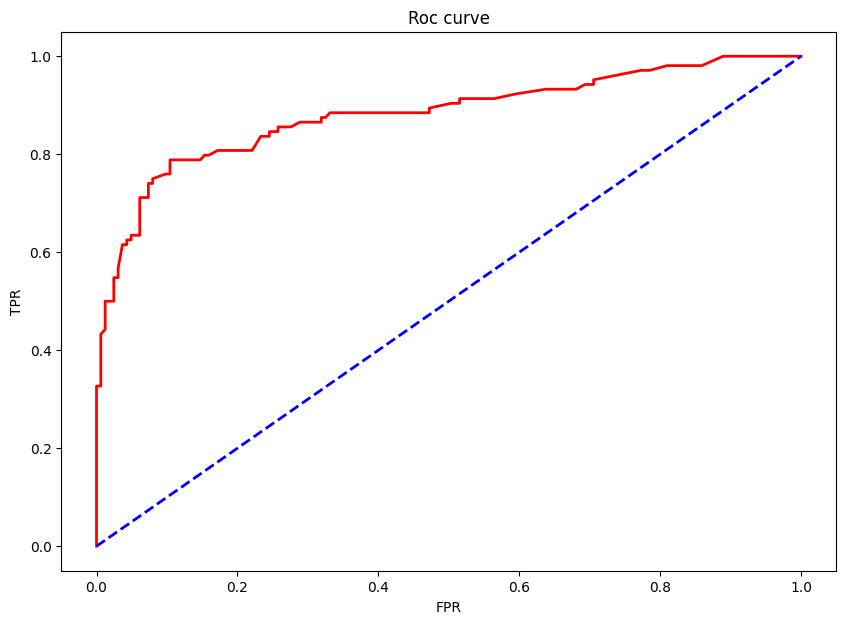

In [416]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [417]:
test["Age"] = test[["Age","Pclass"]].apply(imputar_edad, axis = 1)

In [418]:
test.drop("Cabin", axis = 1, inplace = True)

In [419]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [420]:
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [421]:
test['Name'] = test['Name'].str.replace(".",",",n = 1).str.replace(' ','')

C:\Users\alfon\AppData\Local\Temp\ipykernel_22132\1282162450.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['Name'] = test['Name'].str.replace(".",",",n = 1).str.replace(' ','')


In [422]:
test[['lastname','title','name']] = test['Name'].str.split(',',expand=True)

In [423]:
test['title'] = test['title'].replace(['Lady', 'theCountess','Capt', 'Col','Don', 'Dr',
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other').replace(
                                                'Mlle', 'Miss').replace(
                                                    'Ms', 'Miss').replace(
                                                        'Mme', 'Mrs')

In [424]:
test = test.drop(['Name','lastname','name'], axis=1)

In [425]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3

In [426]:
test['Fare'] = test['Fare'].astype(int)

In [427]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
title          0
dtype: int64

In [428]:
test.loc[ test['Age'] <= 20, 'Age'] = 0
test.loc[(test['Age'] > 20) & (test['Age'] <= 24), 'Age'] = 1
test.loc[(test['Age'] > 24) & (test['Age'] <= 30), 'Age']   = 2
test.loc[(test['Age'] > 30) & (test['Age'] <= 38), 'Age']   = 3
test.loc[ test['Age'] > 38, 'Age'] = 4

In [429]:
test['Age'] = test['Age'].astype(int)

In [430]:
title = pd.get_dummies(test["title"], drop_first = True)

In [431]:
sex = pd.get_dummies(test["Sex"], drop_first = True)

In [432]:
embarked = pd.get_dummies(test["Embarked"], drop_first = True)

In [433]:
entrega = pd.concat([test,sex,embarked,title] , axis = 1)

In [434]:
entrega.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,male,Q,S,Miss,Mr,Mrs,Other
0,892,3,male,3,0,0,330911,0,Q,Mr,1,1,0,0,1,0,0
1,893,3,female,4,1,0,363272,0,S,Mrs,0,0,1,0,0,1,0
2,894,2,male,4,0,0,240276,1,Q,Mr,1,1,0,0,1,0,0
3,895,3,male,2,0,0,315154,1,S,Mr,1,0,1,0,1,0,0
4,896,3,female,1,1,1,3101298,1,S,Mrs,0,0,1,0,0,1,0


In [435]:
entrega.drop(['Sex', 'Embarked', 'Ticket','title'], axis = 1, inplace = True)

In [436]:
entrega.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other
0,892,3,3,0,0,0,1,1,0,0,1,0,0
1,893,3,4,1,0,0,0,0,1,0,0,1,0
2,894,2,4,0,0,1,1,1,0,0,1,0,0
3,895,3,2,0,0,1,1,0,1,0,1,0,0
4,896,3,1,1,1,1,0,0,1,0,0,1,0


In [437]:
passenger_id = entrega[["PassengerId"]]

In [438]:
passenger_id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [439]:
entrega.drop("PassengerId", axis =1, inplace = True)

In [440]:
entrega.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Other
0,3,3,0,0,0,1,1,0,0,1,0,0
1,3,4,1,0,0,0,0,1,0,0,1,0
2,2,4,0,0,1,1,1,0,0,1,0,0
3,3,2,0,0,1,1,0,1,0,1,0,0
4,3,1,1,1,1,0,0,1,0,0,1,0


In [441]:
predicciones = logmodel.predict(entrega)

In [442]:
predicciones

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [443]:
predicciones = pd.DataFrame(logmodel.predict(entrega))

In [444]:
predicciones

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [445]:
entrega_titanic = pd.concat([passenger_id, predicciones], axis = 1)

In [446]:
entrega_titanic.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [447]:
entrega_titanic.columns = ["PassengerId", "Survived"]

In [448]:
entrega_titanic.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [449]:
entrega_titanic.to_csv("entrega_titanic.csv", index = False)